In [87]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import cv2 
from PIL import Image
import requests
from io import BytesIO
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


In [61]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [62]:

x_train = x_train / 255.0
x_test = x_test / 255.0
print("The shape of X train is" + str(x_train.shape))
print("The shape of Y train is " + str(y_train.shape))
print("Shape of test X and Y is: ")
print(x_test.shape)
print(y_test.shape)
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())

The shape of X train is(60000, 28, 28)
The shape of Y train is (60000,)
Shape of test X and Y is: 
(10000, 28, 28)
(10000,)
Min pixel value: 0.0
Max pixel value: 1.0


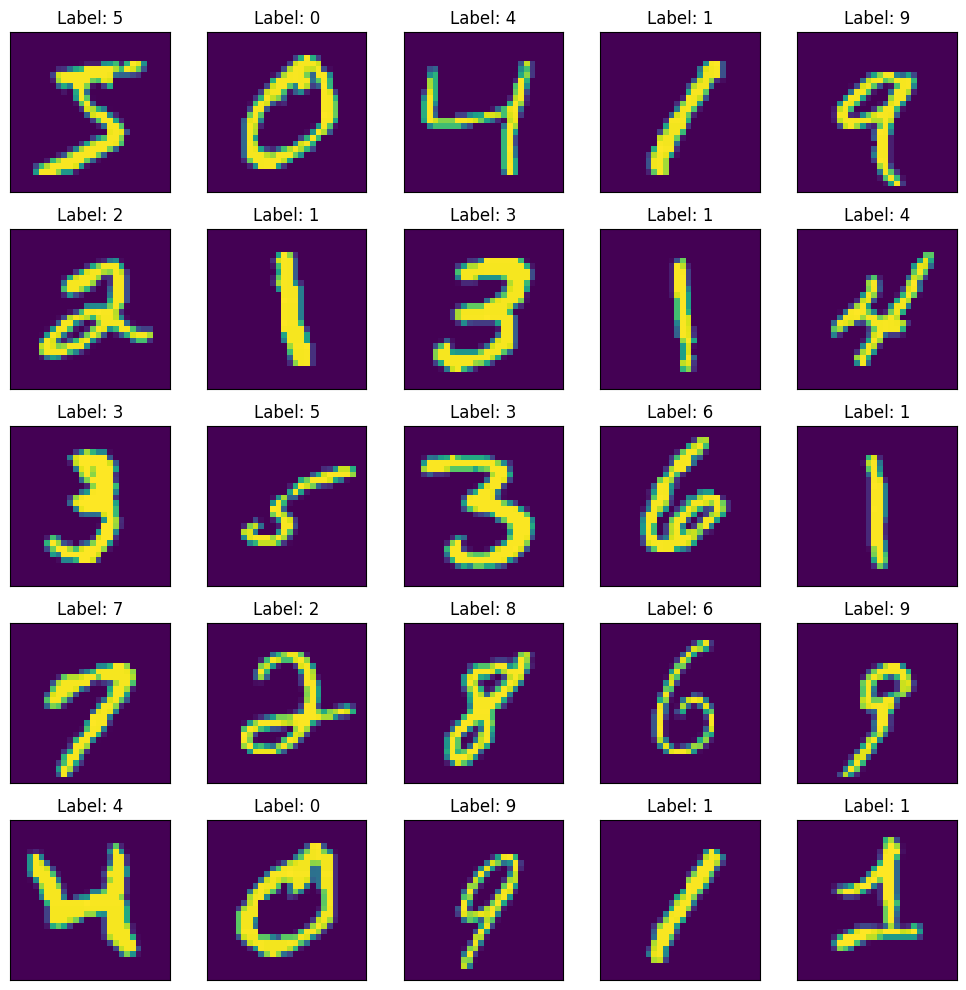

In [63]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i]}")

plt.tight_layout()
plt.show()

In [65]:
tf.random.set_seed(1234)
model = Sequential(

    [

        Flatten(input_shape = (28,28)),
        Dense(128, activation = 'relu'),
        Dense(64, activation='relu'),
        Dense(10, activation = 'linear')
    ],name = 'my_model')
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=['accuracy'] 
)
history = model.fit(
    x_train,y_train,
    epochs = 40
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9868 - loss: 0.0566
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9907 - loss: 0.0300
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9918 - loss: 0.0239
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0215
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0206
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9932 - loss: 0.0197
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9931 - loss: 0.0195
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0180
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9935 - loss: 0.0176
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9937 - loss: 0.0174
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0167
Epoch 12/40
1875/1875 ━━━━━━━━

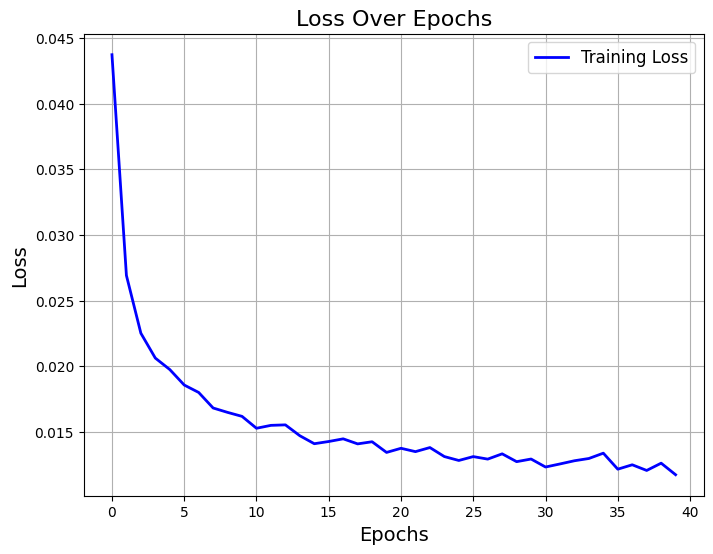

In [69]:
loss = history.history['loss']

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(loss, label='Training Loss', color='blue', linewidth=2)
plt.title('Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [73]:
model.save("best_model.keras")


In [74]:
print(f"True label: {y_test[0]}")

# Add batch dimension to test image
test_image = np.expand_dims(x_test[0], axis=0)

# Get model's raw predictions (logits)
logits = model.predict(test_image)

# Convert logits to probabilities using softmax
probabilities = tf.nn.softmax(logits).numpy()

# Print the probabilities for each class
print("Prediction probabilities:", probabilities)

# Find the class with the highest probability
predicted_class = np.argmax(probabilities)
print(f"Predicted class: {predicted_class}")

True label: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Prediction probabilities: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Predicted class: 7


In [75]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 1.1453       
Test Accuracy: 0.97


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


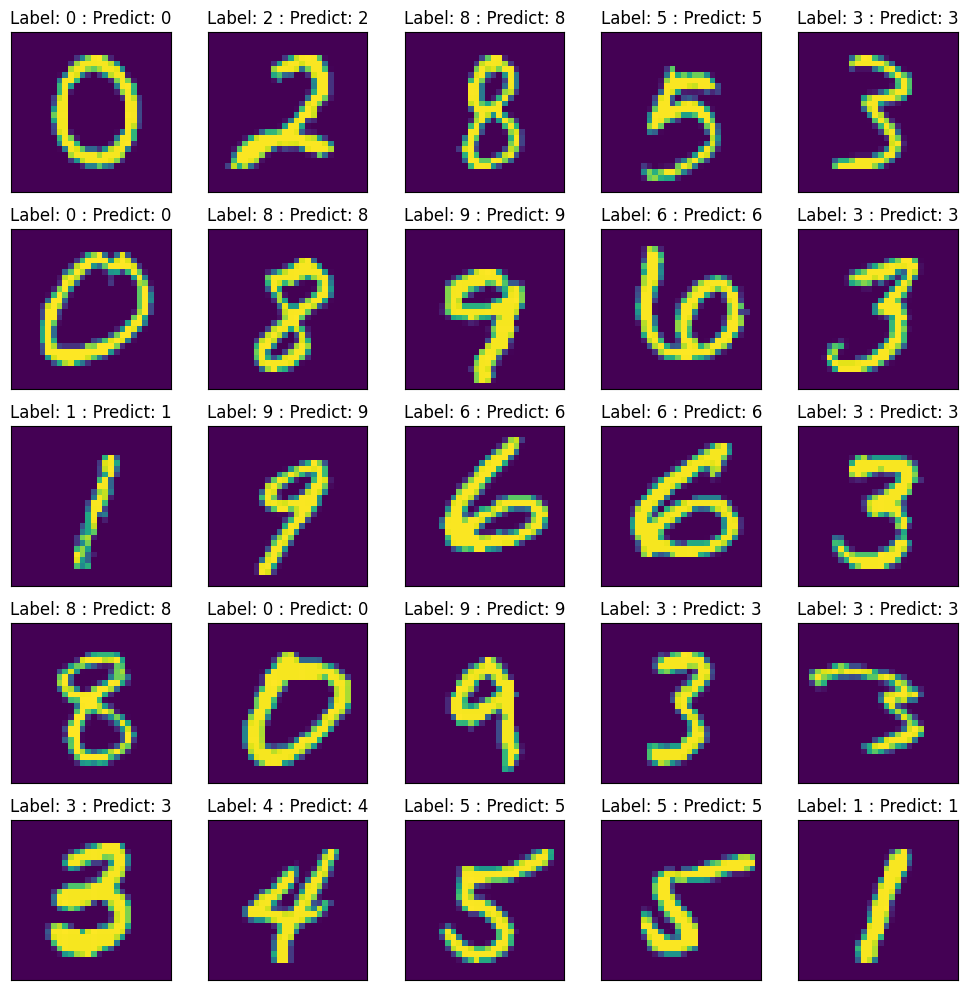

In [78]:
import random
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])
    plt.grid(False)
    randomno = random.randrange(0,10000)
    random_image = np.expand_dims(x_test[randomno], axis = 0)
    logits_random = model.predict(random_image)
    predicted_class = np.argmax(logits_random)
    
    
    plt.imshow(x_test[randomno])
    
    plt.title(f"Label: {y_test[randomno]} : Predict: {predicted_class}")

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


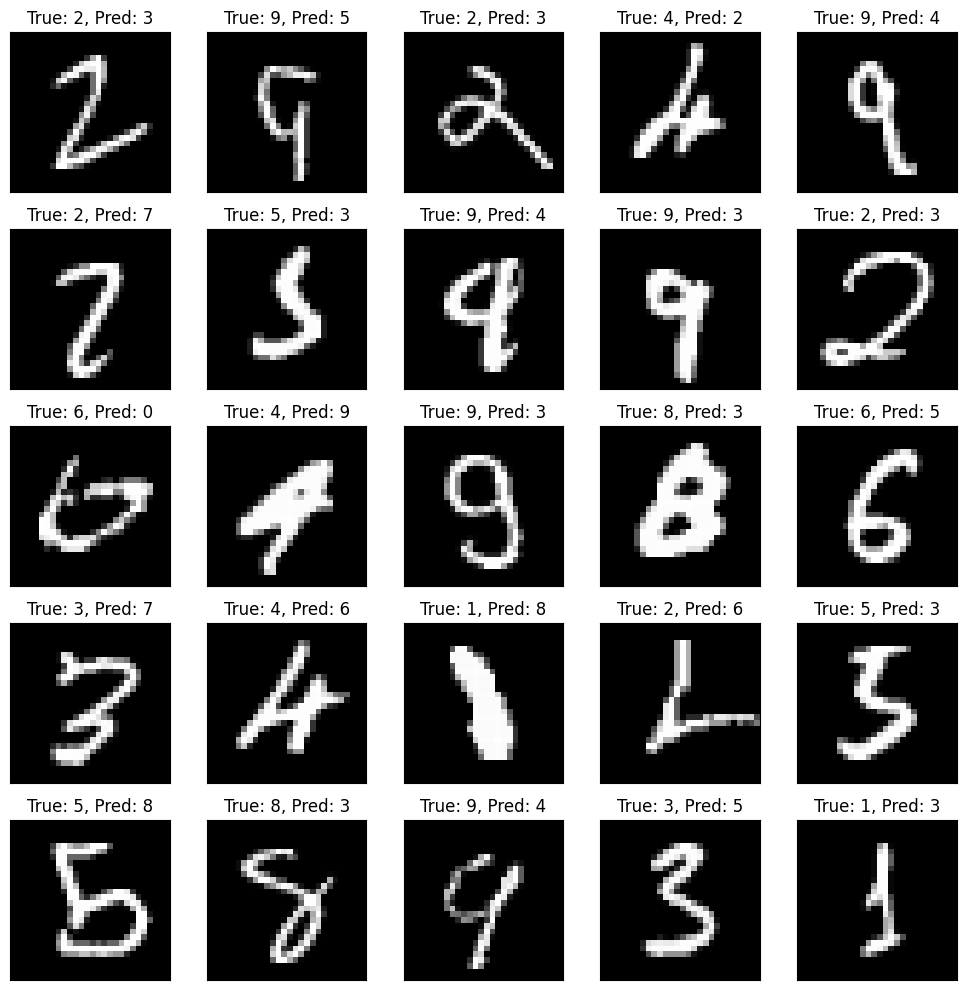

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Get model predictions
predictions = model.predict(x_test)

# Step 2: Find indices where predictions are incorrect
incorrect_indices = np.where(np.argmax(predictions, axis=1) != y_test)[0]  # No np.argmax on y_test

# Step 3: Plot images that were predicted incorrectly
plt.figure(figsize=(10, 10))
for i, idx in enumerate(incorrect_indices[:25]):  # Show up to 25 incorrect images
    plt.subplot(5, 5, i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {np.argmax(predictions[idx])}")
plt.tight_layout()
plt.show()
